In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import datetime

In [4]:
now = datetime.now()
now

datetime.datetime(2024, 4, 29, 14, 38, 25, 321010)

In [5]:
now.day, now.month, now.weekday(), now.year

(29, 4, 0, 2024)

In [6]:
delta = now - datetime(year=2023, month=12, day=28)
delta

datetime.timedelta(days=123, seconds=52705, microseconds=321010)

In [7]:
delta.days

123

In [8]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)


datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [10]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [11]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [13]:
datestrs = ["7/6/2011", "8/6/2011"]
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [12]:
value = "2011-01-03"
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [15]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [17]:
idx.isna()

array([False, False,  True])

In [18]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [19]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [20]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [22]:
ts.index.dtype

dtype('<M8[ns]')

In [23]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [24]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [25]:
ts["2011-01-10"]

1.9657805725027142

In [42]:
longer_ts = pd.Series(
    np.random.standard_normal(366),
    index=pd.date_range('2024-01-01', periods=366)
    )
longer_ts

2024-01-01    0.488675
2024-01-02   -0.178098
2024-01-03    2.122315
2024-01-04    0.061192
2024-01-05    0.884111
                ...   
2024-12-27   -1.387680
2024-12-28    0.767902
2024-12-29   -1.164490
2024-12-30    1.527070
2024-12-31    0.287542
Freq: D, Length: 366, dtype: float64

In [43]:
longer_ts['2024']

2024-01-01    0.488675
2024-01-02   -0.178098
2024-01-03    2.122315
2024-01-04    0.061192
2024-01-05    0.884111
                ...   
2024-12-27   -1.387680
2024-12-28    0.767902
2024-12-29   -1.164490
2024-12-30    1.527070
2024-12-31    0.287542
Freq: D, Length: 366, dtype: float64

In [44]:
longer_ts["2024-05-23"]

-0.6300887542529402

In [46]:
longer_ts[datetime(2024, 12, 1):]

2024-12-01   -0.272202
2024-12-02   -1.020232
2024-12-03    0.402790
2024-12-04    1.554831
2024-12-05    0.756181
                ...   
2024-12-27   -1.387680
2024-12-28    0.767902
2024-12-29   -1.164490
2024-12-30    1.527070
2024-12-31    0.287542
Freq: D, Length: 31, dtype: float64

In [47]:
longer_ts[datetime(2024,1, 7):datetime(2024, 1, 10)]

2024-01-07   -0.072052
2024-01-08    0.544066
2024-01-09    0.323886
2024-01-10   -1.683325
Freq: D, dtype: float64

In [49]:
longer_ts["2024-01-01":"2024-01-05"]

2024-01-01    0.488675
2024-01-02   -0.178098
2024-01-03    2.122315
2024-01-04    0.061192
2024-01-05    0.884111
Freq: D, dtype: float64

In [52]:
start_date = '2024-01-01'
end_date = '2024-01-05'
longer_ts.truncate(after=end_date, before=start_date)

2024-01-01    0.488675
2024-01-02   -0.178098
2024-01-03    2.122315
2024-01-04    0.061192
2024-01-05    0.884111
Freq: D, dtype: float64

In [56]:
wed_24 = pd.date_range("2024-01-01", periods=52, freq="W-WED")
wed_24[-2:]

DatetimeIndex(['2024-12-18', '2024-12-25'], dtype='datetime64[ns]', freq='W-WED')

In [59]:
longer_ts.loc[wed_24]

2024-01-03    2.122315
2024-01-10   -1.683325
2024-01-17    0.089175
2024-01-24   -0.009813
2024-01-31   -1.186623
                ...   
2024-11-27   -1.801179
2024-12-04    1.554831
2024-12-11    0.442271
2024-12-18   -0.508724
2024-12-25    0.954768
Freq: 7D, Length: 52, dtype: float64

In [53]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates,
                       columns=["Colorado", "Texas",
                                "New York", "Ohio"])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.715359,-0.345805,0.470886,-1.121515
2000-01-12,-1.544365,1.720513,-0.171724,-0.827840
2000-01-19,0.370548,-0.674167,-1.712340,-0.738151
2000-01-26,0.391813,1.763403,-0.054630,-0.656506
2000-02-02,-1.550087,-0.044347,0.681470,-0.953726
...,...,...,...,...
2001-10-31,1.295960,0.469002,-2.195325,-1.221725
2001-11-07,0.963414,0.107341,-1.255465,-0.534739
2001-11-14,0.959506,-0.807201,-0.005354,0.175242
2001-11-21,1.840241,-1.822233,-0.374730,1.765640


In [60]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                          "2000-01-02", "2000-01-03"])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [61]:
dup_ts.index.is_unique

False

In [62]:
dup_ts['2000-01-03']

4

In [63]:
dup_ts["2000-01-02"]  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [64]:
grouped = dup_ts.groupby(level=0)

In [65]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [66]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [67]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [68]:

resampler = ts.resample("D")
resampler

In [69]:
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [70]:
pd.date_range(start="2012-04-01", periods=20)
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [71]:
pd.date_range("2024-01-01", "2024-12-31", freq="BM")

DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-29', '2024-04-30',
               '2024-05-31', '2024-06-28', '2024-07-31', '2024-08-30',
               '2024-09-30', '2024-10-31', '2024-11-29', '2024-12-31'],
              dtype='datetime64[ns]', freq='BM')

In [72]:
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [75]:
pd.date_range("2012-05-02 23:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [76]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [77]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [78]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [79]:
Hour(2) + Minute(30)

<150 * Minutes>

In [80]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [81]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [94]:
ts = pd.Series([1, 2, 3, 4],
               index=pd.date_range("2000-01-01", periods=4, freq="M"))
ts

2000-01-31    1
2000-02-29    2
2000-03-31    3
2000-04-30    4
Freq: M, dtype: int64

In [101]:
ts.shift(2)

2000-01-31    NaN
2000-02-29    NaN
2000-03-31    1.0
2000-04-30    2.0
Freq: M, dtype: float64

In [97]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    1.000000
2000-03-31    0.500000
2000-04-30    0.333333
Freq: M, dtype: float64

In [98]:
ts.pct_change()

2000-01-31         NaN
2000-02-29    1.000000
2000-03-31    0.500000
2000-04-30    0.333333
Freq: M, dtype: float64

In [103]:
ts.shift(2, freq="M")

2000-03-31    1
2000-04-30    2
2000-05-31    3
2000-06-30    4
Freq: M, dtype: int64

In [106]:
ts.shift(periods=2, freq='D')

2000-02-02    1
2000-03-02    2
2000-04-02    3
2000-05-02    4
dtype: int64

In [105]:
ts.shift(1, freq="1h30min")

2000-01-31 01:30:00    1
2000-02-29 01:30:00    2
2000-03-31 01:30:00    3
2000-04-30 01:30:00    4
dtype: int64

In [102]:
ts

2000-01-31    1
2000-02-29    2
2000-03-31    3
2000-04-30    4
Freq: M, dtype: int64

In [108]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime.now()
now + 3 * Day()

Timestamp('2024-05-02 17:26:00.864021')

In [109]:
now + MonthEnd()

Timestamp('2024-04-30 17:26:00.864021')

In [110]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2024-04-30 17:26:00.864021')

In [111]:
offset.rollback(now)

Timestamp('2024-03-31 17:26:00.864021')

In [112]:
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range("2000-01-15", periods=20, freq="4D"))
ts

2000-01-15   -1.118327
2000-01-19    0.386220
2000-01-23    0.224123
2000-01-27   -1.359184
2000-01-31    1.093890
2000-02-04   -1.254319
2000-02-08   -2.925113
2000-02-12    0.654578
2000-02-16    1.227245
2000-02-20    0.401170
2000-02-24   -0.408796
2000-02-28    2.152572
2000-03-03   -1.971941
2000-03-07   -0.582811
2000-03-11   -0.683034
2000-03-15   -0.214185
2000-03-19   -0.670407
2000-03-23    0.096311
2000-03-27   -0.861900
2000-03-31    1.120103
Freq: 4D, dtype: float64

In [113]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31   -0.154656
2000-02-29   -0.021809
2000-03-31   -0.470983
dtype: float64

In [115]:
ts.groupby(ts.index.month).mean()

1   -0.154656
2   -0.021809
3   -0.470983
dtype: float64

In [122]:
ts.resample("M").mean()

2000-01-31   -0.154656
2000-02-29   -0.021809
2000-03-31   -0.470983
Freq: M, dtype: float64

In [123]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [124]:
for timezone in pytz.common_timezones:
    if 'Shanghai' in timezone:
        print(timezone) 

Asia/Shanghai


In [125]:
tz = pytz.timezone("Asia/Shanghai")
tz

<DstTzInfo 'Asia/Shanghai' LMT+8:06:00 STD>

In [126]:
dates = pd.date_range("2012-03-09 09:30", periods=6)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-09 09:30:00    1.421439
2012-03-10 09:30:00   -0.079464
2012-03-11 09:30:00    0.599116
2012-03-12 09:30:00   -0.580929
2012-03-13 09:30:00    1.636053
2012-03-14 09:30:00    1.812750
Freq: D, dtype: float64

In [127]:
print(ts.index.tz)

None


In [128]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [129]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-09 09:30:00+00:00    1.421439
2012-03-10 09:30:00+00:00   -0.079464
2012-03-11 09:30:00+00:00    0.599116
2012-03-12 09:30:00+00:00   -0.580929
2012-03-13 09:30:00+00:00    1.636053
2012-03-14 09:30:00+00:00    1.812750
Freq: D, dtype: float64

In [130]:
ts_utc.tz_convert("Asia/Shanghai")

2012-03-09 17:30:00+08:00    1.421439
2012-03-10 17:30:00+08:00   -0.079464
2012-03-11 17:30:00+08:00    0.599116
2012-03-12 17:30:00+08:00   -0.580929
2012-03-13 17:30:00+08:00    1.636053
2012-03-14 17:30:00+08:00    1.812750
Freq: D, dtype: float64

In [132]:
ts_eastern = ts.tz_localize("America/New_York")

In [133]:
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 15:30:00+01:00    1.421439
2012-03-10 15:30:00+01:00   -0.079464
2012-03-11 14:30:00+01:00    0.599116
2012-03-12 14:30:00+01:00   -0.580929
2012-03-13 14:30:00+01:00    1.636053
2012-03-14 14:30:00+01:00    1.812750
dtype: float64

In [134]:
ts_eastern.tz_convert("UTC")

2012-03-09 14:30:00+00:00    1.421439
2012-03-10 14:30:00+00:00   -0.079464
2012-03-11 13:30:00+00:00    0.599116
2012-03-12 13:30:00+00:00   -0.580929
2012-03-13 13:30:00+00:00    1.636053
2012-03-14 13:30:00+00:00    1.812750
dtype: float64

In [135]:
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

In [136]:
stamp = pd.Timestamp("2011-03-12 04:00")
stamp_utc = stamp.tz_localize("utc")
stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [137]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [138]:
stamp_utc.value, stamp_utc.tz_convert("America/New_York").value

(1299902400000000000, 1299902400000000000)

In [139]:
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern")
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [140]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [141]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern")
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [146]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts


2012-03-07 09:30:00    0.119240
2012-03-08 09:30:00    0.748200
2012-03-09 09:30:00    0.487745
2012-03-12 09:30:00   -1.655868
2012-03-13 09:30:00    2.135547
2012-03-14 09:30:00   -0.722338
2012-03-15 09:30:00    1.059155
2012-03-16 09:30:00    1.232452
2012-03-19 09:30:00    0.175856
2012-03-20 09:30:00   -0.550110
Freq: B, dtype: float64

In [147]:
ts1 = ts[:7].tz_localize("Europe/London")
ts2 = ts1[2:].tz_convert("Europe/Moscow")


DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [153]:
result = ts1 + ts2
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    0.975490
2012-03-12 09:30:00+00:00   -3.311737
2012-03-13 09:30:00+00:00    4.271094
2012-03-14 09:30:00+00:00   -1.444677
2012-03-15 09:30:00+00:00    2.118309
dtype: float64

In [154]:
p = pd.Period("2011", freq="A-DEC")
p

Period('2011', 'A-DEC')

In [155]:
p + 5

Period('2016', 'A-DEC')

In [156]:
pd.Period("2014", freq="A-DEC") - p

<3 * YearEnds: month=12>

In [157]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [158]:
pd.Series(np.random.standard_normal(6), index=periods)

2000-01    1.234193
2000-02   -0.235629
2000-03    1.132309
2000-04   -0.228211
2000-05   -1.408339
2000-06   -0.006248
Freq: M, dtype: float64

In [159]:
values = ["2001Q3", "2002Q2", "2003Q1"]
index = pd.PeriodIndex(values, freq="Q-DEC")
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [160]:
p = pd.Period("2011", freq="A-DEC")
p

Period('2011', 'A-DEC')

In [165]:
p.asfreq('M')

Period('2011-12', 'M')

In [166]:

p.asfreq("M", how="start")
p.asfreq("M", how="end")
p.asfreq("M")

Period('2011-12', 'M')

In [167]:
p = pd.Period("2011", freq="A-JUN")
p


Period('2011', 'A-JUN')

In [169]:
p.asfreq("M", how="start")

Period('2010-07', 'M')

In [168]:

p.asfreq("M", how="end")

Period('2011-06', 'M')

In [170]:
p = pd.Period("Aug-2011", "M")
p.asfreq("A-JUN")

Period('2012', 'A-JUN')

In [171]:
periods = pd.period_range("2006", "2009", freq="A-DEC")
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts


2006   -0.558359
2007   -0.458344
2008   -1.944667
2009    1.670835
Freq: A-DEC, dtype: float64

In [172]:
ts.asfreq("M", how="start")

2006-01   -0.558359
2007-01   -0.458344
2008-01   -1.944667
2009-01    1.670835
Freq: M, dtype: float64

In [175]:
ts.asfreq("B", how="end")

2006-12-29   -0.558359
2007-12-31   -0.458344
2008-12-31   -1.944667
2009-12-31    1.670835
Freq: B, dtype: float64

In [176]:
p = pd.Period("2012Q4", freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [177]:
p.asfreq("D", how="start")

Period('2011-11-01', 'D')

In [178]:

p.asfreq("D", how="end")

Period('2012-01-31', 'D')

In [179]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60
p4pm
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [180]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")
ts = pd.Series(np.arange(len(periods)), index=periods)
ts
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16
ts.index = new_periods.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [181]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")
ts = pd.Series(np.random.standard_normal(3), index=dates)
ts


2000-01-31   -1.916200
2000-02-29    0.128161
2000-03-31   -0.823771
Freq: M, dtype: float64

In [188]:
pts = ts.to_period()
pts

2000-01   -1.916200
2000-02    0.128161
2000-03   -0.823771
Freq: M, dtype: float64

In [189]:
pts.to_timestamp()

2000-01-01   -1.916200
2000-02-01    0.128161
2000-03-01   -0.823771
Freq: MS, dtype: float64

In [183]:
dates = pd.date_range("2000-01-29", periods=6)
ts2 = pd.Series(np.random.standard_normal(6), index=dates)
ts2

2000-01-29    0.817693
2000-01-30    0.381219
2000-01-31    0.168148
2000-02-01   -0.221010
2000-02-02   -1.354403
2000-02-03    0.644007
Freq: D, dtype: float64

In [187]:
ts2.to_period()

2000-01-29    0.817693
2000-01-30    0.381219
2000-01-31    0.168148
2000-02-01   -0.221010
2000-02-02   -1.354403
2000-02-03    0.644007
Freq: D, dtype: float64

In [186]:
pts = ts2.to_period()
pts.to_timestamp(how="end")

2000-01-29 23:59:59.999999999    0.817693
2000-01-30 23:59:59.999999999    0.381219
2000-01-31 23:59:59.999999999    0.168148
2000-02-01 23:59:59.999999999   -0.221010
2000-02-02 23:59:59.999999999   -1.354403
2000-02-03 23:59:59.999999999    0.644007
Freq: D, dtype: float64

In [190]:
data = pd.read_csv("examples/macrodata.csv")
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [191]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [192]:
data.index = index
data["infl"]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [193]:
dates = pd.date_range("2000-01-01", periods=100)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2000-01-01   -0.201342
2000-01-02    1.019051
2000-01-03    0.211994
2000-01-04   -0.371211
2000-01-05    0.845983
                ...   
2000-04-05    0.222034
2000-04-06   -0.133096
2000-04-07    0.396723
2000-04-08    1.104566
2000-04-09   -0.501685
Freq: D, Length: 100, dtype: float64

In [194]:
ts.resample("M").mean()

2000-01-31    0.134660
2000-02-29    0.180827
2000-03-31    0.110885
2000-04-30    0.038291
Freq: M, dtype: float64

In [195]:
ts.resample('M', kind='period').mean()

2000-01    0.134660
2000-02    0.180827
2000-03    0.110885
2000-04    0.038291
Freq: M, dtype: float64

In [196]:
dates = pd.date_range("2000-01-01", periods=12, freq="T")
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [197]:
ts.resample("5min").sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [198]:
ts.resample("5min", closed="right").sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [209]:
ts.resample("5min", closed="right", label="right").sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [206]:
from pandas.tseries.frequencies import to_offset
result = ts.resample("5min", closed="right", label="right").sum()
result.index = result.index + to_offset("-1s")
result

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [212]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)
ts

2000-01-01 00:00:00    10
2000-01-01 00:01:00     3
2000-01-01 00:02:00     4
2000-01-01 00:03:00     8
2000-01-01 00:04:00    11
2000-01-01 00:05:00     2
2000-01-01 00:06:00     9
2000-01-01 00:07:00     0
2000-01-01 00:08:00     5
2000-01-01 00:09:00     1
2000-01-01 00:10:00     6
2000-01-01 00:11:00     7
Freq: T, dtype: int64

In [213]:
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,10,11,3,11
2000-01-01 00:05:00,2,9,0,1
2000-01-01 00:10:00,6,7,6,7


In [214]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                     index=pd.date_range("2000-01-01", periods=2,
                                         freq="W-WED"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.438341,-1.047999,0.696995,-1.430468
2000-01-12,1.008834,0.327766,1.151361,0.001243


In [216]:
frame.resample('D').asfreq()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.438341,-1.047999,0.696995,-1.430468
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.008834,0.327766,1.151361,0.001243


In [217]:
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.438341,-1.047999,0.696995,-1.430468
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.008834,0.327766,1.151361,0.001243


In [218]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.438341,-1.047999,0.696995,-1.430468
2000-01-06,-0.438341,-1.047999,0.696995,-1.430468
2000-01-07,-0.438341,-1.047999,0.696995,-1.430468
2000-01-08,-0.438341,-1.047999,0.696995,-1.430468
2000-01-09,-0.438341,-1.047999,0.696995,-1.430468
2000-01-10,-0.438341,-1.047999,0.696995,-1.430468
2000-01-11,-0.438341,-1.047999,0.696995,-1.430468
2000-01-12,1.008834,0.327766,1.151361,0.001243


In [219]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.438341,-1.047999,0.696995,-1.430468
2000-01-06,-0.438341,-1.047999,0.696995,-1.430468
2000-01-07,-0.438341,-1.047999,0.696995,-1.430468
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.008834,0.327766,1.151361,0.001243


In [220]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.438341,-1.047999,0.696995,-1.430468
2000-01-13,1.008834,0.327766,1.151361,0.001243


In [225]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index=pd.period_range("1-2000", "12-2001",
                                           freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01,-0.620521,0.227290,0.922264,-2.153545
2000-02,-0.365757,-0.375842,0.329939,0.981994
2000-03,1.105913,-1.613716,1.561587,0.406510
2000-04,0.359244,-0.614436,-1.691656,0.758701
2000-05,-0.682273,-1.038534,0.635111,-0.600026
...,...,...,...,...
2001-08,-0.382199,0.588151,2.653656,-1.101910
2001-09,-0.608443,-0.340831,0.197070,1.129965
2001-10,-1.078691,0.261523,0.473563,-0.939801
2001-11,1.220978,-0.852899,0.738368,0.342443


In [226]:
annual_frame = frame.resample("A-DEC").sum()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.708384,-6.830187,2.756034,-1.955184
2001,-2.543013,-2.491293,1.136456,-0.636271


In [227]:
annual_frame.resample("Q-DEC").ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.708384,-6.830187,2.756034,-1.955184
2000Q2,0.708384,-6.830187,2.756034,-1.955184
2000Q3,0.708384,-6.830187,2.756034,-1.955184
2000Q4,0.708384,-6.830187,2.756034,-1.955184
2001Q1,-2.543013,-2.491293,1.136456,-0.636271
2001Q2,-2.543013,-2.491293,1.136456,-0.636271
2001Q3,-2.543013,-2.491293,1.136456,-0.636271
2001Q4,-2.543013,-2.491293,1.136456,-0.636271


In [228]:
# Q-DEC: Quarterly, year ending in December

annual_frame.resample("Q-DEC", convention="end").asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,0.708384,-6.830187,2.756034,-1.955184
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-2.543013,-2.491293,1.136456,-0.636271


In [229]:
annual_frame.resample("Q-MAR").ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.708384,-6.830187,2.756034,-1.955184
2001Q1,0.708384,-6.830187,2.756034,-1.955184
2001Q2,0.708384,-6.830187,2.756034,-1.955184
2001Q3,0.708384,-6.830187,2.756034,-1.955184
2001Q4,-2.543013,-2.491293,1.136456,-0.636271
2002Q1,-2.543013,-2.491293,1.136456,-0.636271
2002Q2,-2.543013,-2.491293,1.136456,-0.636271
2002Q3,-2.543013,-2.491293,1.136456,-0.636271


In [230]:
N = 15
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)
df = pd.DataFrame({"time": times,
                   "value": np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [231]:
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [232]:
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N * 3.)})
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [238]:
df2.set_index('time').resample('5min')['value'].sum()

time
2017-05-20 00:00:00    105.0
2017-05-20 00:05:00    330.0
2017-05-20 00:10:00    555.0
Freq: 5T, Name: value, dtype: float64

In [233]:
time_key = pd.Grouper(freq='5min')

In [234]:
resampled = df2.set_index('time').groupby(['key', time_key]).sum()
resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [235]:
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


In [245]:
close_px_all = pd.read_csv("examples/stock_px.csv",
                           parse_dates=True, index_col=0)
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px[:10]

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [246]:
close_px = close_px.resample("B").ffill()
close_px[:10]

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


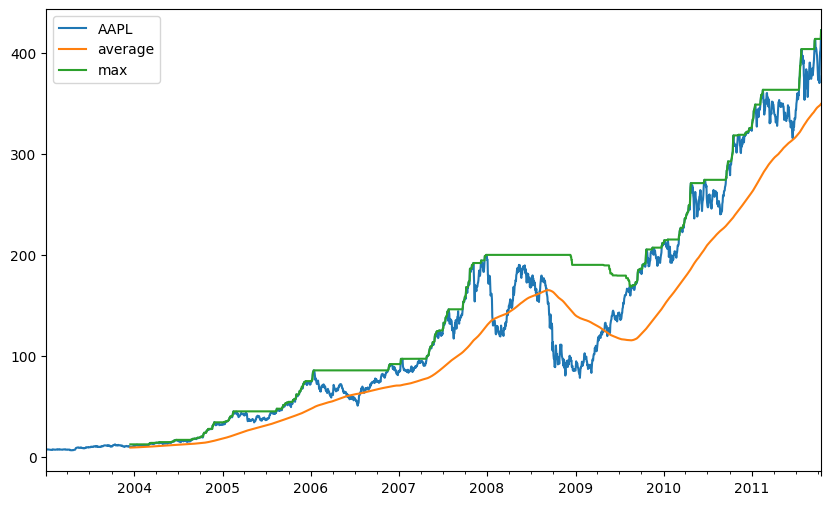

In [267]:
close_px["AAPL"].plot(label='AAPL')
close_px["AAPL"].rolling(250).mean().plot(label='average')
close_px["AAPL"].rolling(250).max().plot(label='max')
plt.legend()

In [254]:
std250 = close_px['AAPL'].pct_change().rolling(250, min_periods=10).std()


<Axes: >

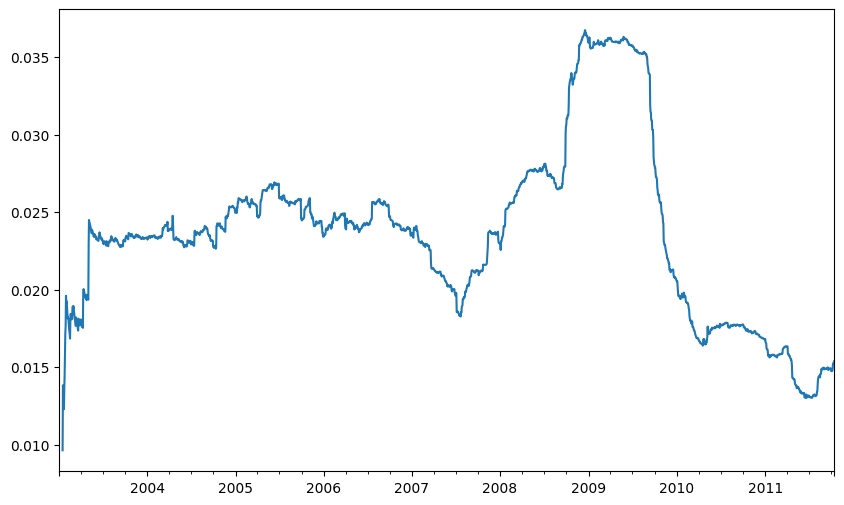

In [255]:
plt.figure()
std250.plot()

<Axes: >

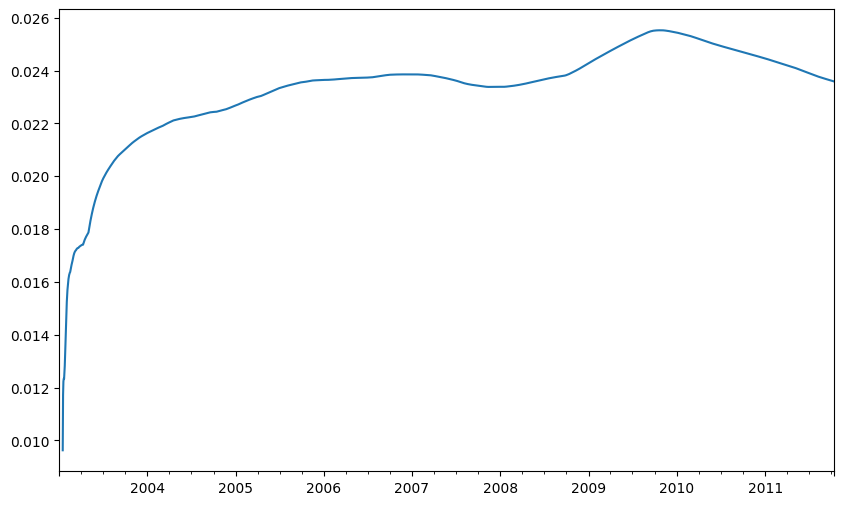

In [257]:
expanding_mean = std250.expanding().mean()
expanding_mean.plot()

In [260]:
series = pd.Series(np.arange(10))
series

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [261]:
series.expanding().mean()

0    0.0
1    0.5
2    1.0
3    1.5
4    2.0
5    2.5
6    3.0
7    3.5
8    4.0
9    4.5
dtype: float64

<Axes: >

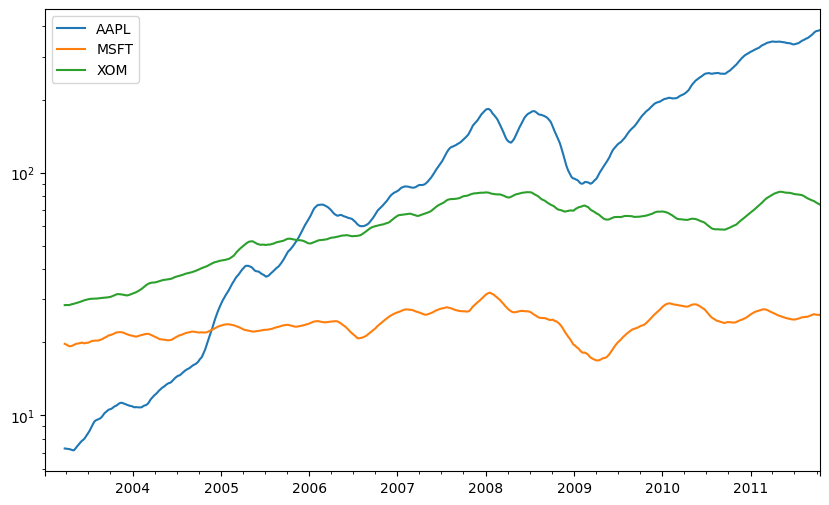

In [268]:
# plt.style.use('grayscale')

close_px.rolling(60).mean().plot(logy=True)

In [269]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


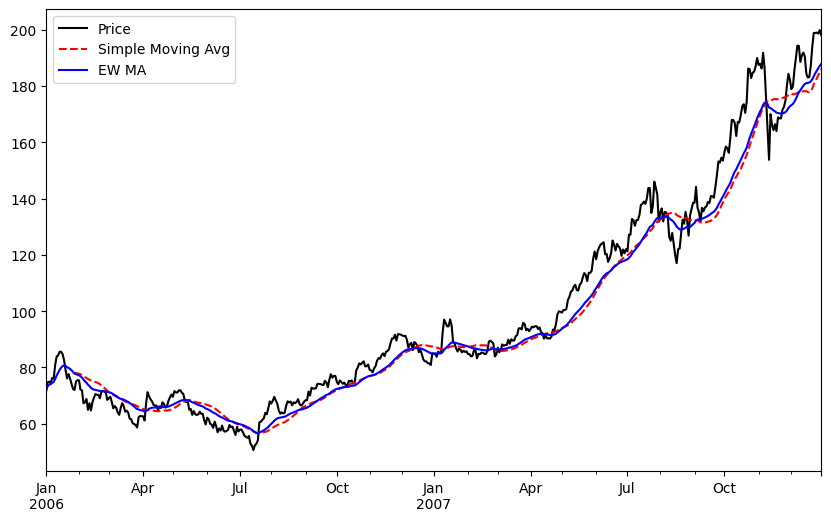

In [273]:
plt.figure()
appl_px = close_px['AAPL']['2006':'2007']

ma_30 = appl_px.rolling(30, min_periods=20).mean()
ewma_30 = appl_px.ewm(span=30).mean()

appl_px.plot(style='k-', label='Price')
ma_30.plot(style='r--', label="Simple Moving Avg")
ewma_30.plot(style='b-', label='EW MA')
plt.legend()


In [111]:
plt.figure()

In [275]:
spx_px = close_px_all["SPX"]
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<Axes: >

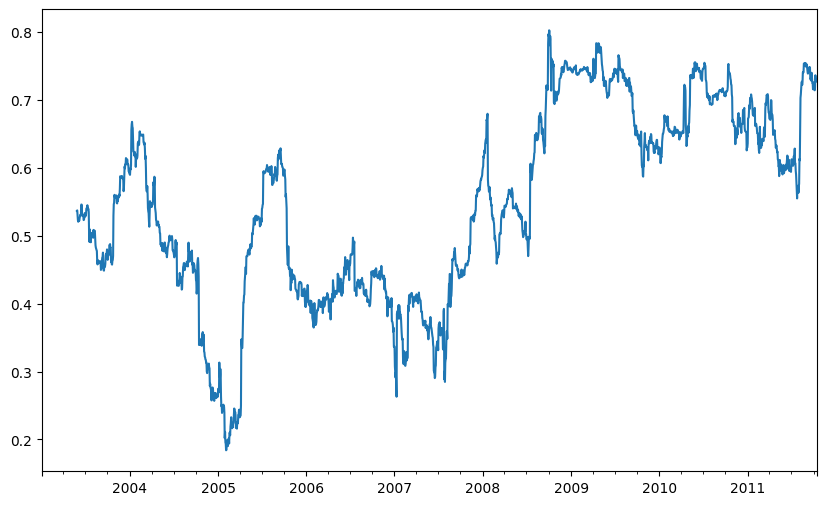

In [276]:
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<Axes: >

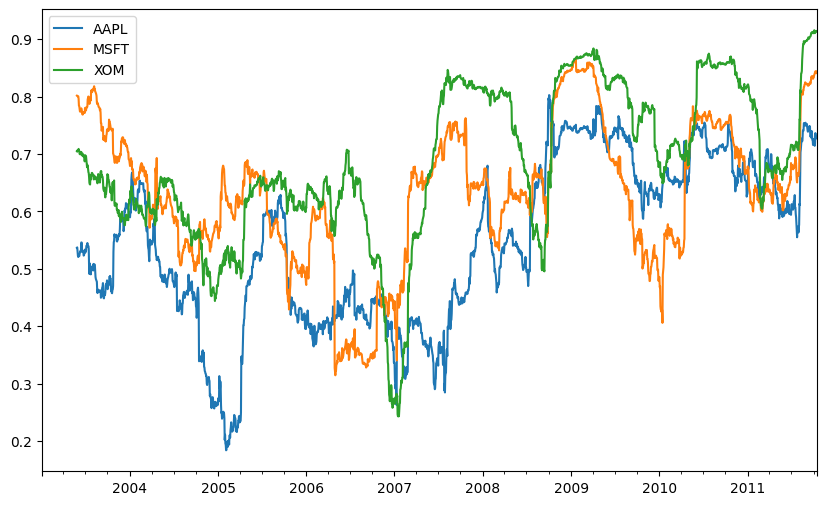

In [278]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [116]:
plt.figure()

In [117]:
from scipy.stats import percentileofscore
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

result = returns["AAPL"].rolling(250).apply(score_at_2percent)
result.plot()

In [119]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS